In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=500
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import requests,json,imp,copy
from io import StringIO
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

bt=imp.load_source("baltic","/Users/evogytis/Documents/baltic/baltic.py")

meta_path='/Users/evogytis/Documents/manuscripts/skeeters/data/CMS001_CMS002_MergedAnnotations_190325.csv'
metadata={}

sample_colour={'ALCO':(0.49803923567136127, 0.43267975250879925, 0.52287583549817396), ## purple
               'WVAL':(0.88366013765335083, 0.77908497055371606, 0.18562091886997223), ## yellow
               'COAV':(0.8162552973803352, 0.41062668737243202, 0.29078047883276847), ## red
               'PLCR':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629), ## green
               'SAND':(0.4666666666666667, 0.7450980392156863, 0.8588235294117647), ## light blue
               'NA':  '#C0C0C0'}

for line in open(meta_path,'r'):
    l=line.strip('\r\n').split(',')
    if 'NewIDseqName' in l[0]:
        header=l
        print(header)
    else:
        metadata[l[0]]={header[i]:l[i].strip(' ') for i in range(len(l))}

California_counties_url='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'
response=requests.get(California_counties_url)

json_map=json.load(StringIO(response.text)) ## import json

features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='name' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
#     location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
    location=loc['properties'][locName]
    polygons[location]=[]
    location_points[location]=[]
    if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in np.asarray(poly): ## iterate over each component polygon
            for coords in np.asarray(part): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
    if loc['geometry']['type']=='Polygon': ## location is single part
        for coords in np.asarray(poly): ## iterate over coordinates
            coords=np.array(coords)
            xs=coords[:,0] ## longitudes
            ys=coords[:,1] ## latitudes
            location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

    complete_location=[]
    for part in location_points[location]: ## iterate over each component of a location
        complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

    polygons[location]=complete_location ## assign list of polygons to a location

['NewIDseqName', 'OldIDseqName', 'czbiohub-mosquito_sequences_id', 'raw_sequence_run_directory', 'host', 'sample_type', 'nucleotide_type', 'collection_date', 'collection_lat', 'collection_long', 'Habitat', 'Population', 'collected_by', 'preservation_method', 'sex', 'life_stage', 'visual_genus', 'visual_species', 'compute_genus', 'compute_species', 'blood_fed', 'sample_unit', 'known_organism', 'detection_method', 'library_prep', 'sequencer', 'rna_dna_input_ng', 'library_prep_batch', 'extraction_batch', 'Notes:']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:62: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [2]:
%%bash

treeannotator=/Users/evogytis/Documents/tools/BEAST_v1.10.4/bin/treeannotator

for seg in /Users/evogytis/Dropbox/Jupyter_notebooks/Biohub/California_mosquitoes/timetree_WuhanMosquitoVirus6/WMV6_*.trees
    do
    mcc=${seg/.trees/.mcc.tree}
    
    $treeannotator -burnin 5000000 -heights ca $seg $mcc
done;

Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.
Please cite: Heled and Bouckaert: Looking for trees in the forest:
summary tree from posterior samples. BMC Evolutionary Biology 2013 13:221.



    TreeAnnotator v1.10.4 Prerelease #bc6cbd9, 2002-2018
                    MCMC Output analysis
                             by
           Andrew Rambaut and Alexei J. Drummond

             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk

               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz


Reading trees (bar assumes 10,000 trees)...
0              25             50             75            100
|--------------|--------------|--------------|--------------|
************************************************************

Total trees read: 10001
Ignoring first 5000000 states (1000 trees).
Total unique clades: 361

Finding maximum credibility tree...
Analyzing 9001 trees...
0              25             50             75            100
|--------------|--------------|--------------|--------------|
**********************************************

In [3]:
segment_paths=!ls /Users/evogytis/Dropbox/Jupyter_notebooks/Biohub/California_mosquitoes/timetree_WuhanMosquitoVirus6/WMV6_*.trees

trees={}
for seg in segment_paths:
    mcc=seg.replace('.trees','.mcc.tree')
    
#     last_tree=!tail -n 1 /Users/evogytis/Downloads/Wuhan6_4segs.Orthomyxo_10_PB2s_Wuhan6like_dated.trees | egrep "tree STATE_([0-9]+)"
#     last_tree=last_tree[0]
#     last_tree=last_tree[:last_tree.index('[')]
# #     print last_tree[0][:30]
    
#     ll=bt.loadNexus(seg,treestring_regex=last_tree)
#     segName=ll.Objects[1].traits.keys()[0].split('.rate')[0]
    
    ll=bt.loadNexus(mcc)
    
    ll.treeStats()
    segName=[tr.split('.rate')[0] for tr in ll.Objects[1].traits.keys() if 'rate' in tr][0]
    segName=segName.split('_')[1]
    trees[segName]=ll.collapseBranches(lambda k:k.traits['posterior']<0.95)


Tree height: 6.722661
Tree length: 20.523449
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)


Tree height: 7.004784
Tree length: 23.382341
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)


Tree height: 6.714001
Tree length: 18.927856
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)


Tree height: 7.186217
Tree length: 21.211987
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)


Tree height: 9.905112
Tree length: 26.759587
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)


Tree height: 6.739239
Tree length: 22.331975
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)



In [4]:
tip_positions={x:{} for x in trees} ## remember the position of each tip in each tree

for t,tr in enumerate(trees.keys()): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    for k in cur_tree.Objects:
        if k.branchType=='leaf':
            tip_positions[tr][k.name]=(k.height,k.y) ## remember (X, Y) position of tip

cmap=mpl.cm.Spectral

segments=['PB1','PB2','PA','NP','gp64','hypothetical']
print(trees.keys())

for X in range(10): ## 10 untangling iterations
    print('iteration %d'%(X+1))
    for t,tr in enumerate(segments): ## iterate over each tree
        print(tr)
        ptr=segments[t-1] ## previous tree
        ntr=segments[t] ## next tree
        seg=trees[ptr] ## fetch appropriate tree
        nex_seg=trees[ntr]
        for k in sorted(nex_seg.Objects,key=lambda q:q.height): ## iterate over branches from most recent to oldest
            if k.branchType=='node': ## can only sort nodes
                leaves=[[seg.tipMap[tip] for tip in w.leaves if tip in seg.tipMap] if w.branchType=='node' else [w.name] for w in k.children] ## descendent tips in current order

                for c in range(len(leaves)):
                    leaves[c]=sorted(leaves[c],key=lambda x:tip_positions[ntr][x][1] if x in tip_positions[ntr] else 0.0) ## sort leaves according to their positions in the next tree
                
                ys=[sorted([tip_positions[ntr][w][1] for w in cl if w in tip_positions[ntr]]) for cl in leaves] ## extract y positions of descendents
                merge_ys=sum(ys,[]) ## flatten list of tip y coordinates
                ypos=sorted(merge_ys) ## get y positions of tips in current order
                
                order={i:x for i,x in enumerate(leaves)} ## dict of tip order: tip name
                
                new_order=sorted(order.keys(),key=lambda x:-np.mean([(tip_positions[ptr][order[x][w]][1]-ypos[w]) for w in range(min([len(order[x]),len(ypos)])) if order[x][w] in tip_positions[ptr]])) ## get new order by sorting existing order based on y position differences
                
                if new_order!=range(len(leaves)): ## if new order is not current order
                    k.children=[k.children[i] for i in new_order] ## assign new order of child branches
                    nex_seg.drawTree() ## update y positions

                    for w in nex_seg.Objects: ## iterate over objects in next tree
                        if w.branchType=='leaf':
                            tip_positions[ntr][w.name]=(w.height,w.y) ## remember new positions
                
        if t==0: ## if first tree
            trees[segments[t]].drawTree() ## update positions
            lvs=sorted([w for w in trees[segments[t]].Objects if w.branchType=='leaf'],key=lambda x:x.y) ## get leaves in y position order
            
            norm=mpl.colors.Normalize(0,len(lvs))
            pos_colours={w.name:cmap(norm(w.y)) for w in lvs} ## assign colour

dict_keys(['NP', 'PA', 'PB1', 'PB2', 'gp64', 'hypothetical'])
iteration 1
PB1
PB2
PA
NP
gp64
hypothetical
iteration 2
PB1
PB2
PA
NP
gp64
hypothetical
iteration 3
PB1
PB2
PA
NP
gp64
hypothetical
iteration 4
PB1
PB2
PA
NP
gp64
hypothetical
iteration 5
PB1
PB2
PA
NP
gp64
hypothetical
iteration 6
PB1
PB2
PA
NP
gp64
hypothetical
iteration 7
PB1
PB2
PA
NP
gp64
hypothetical
iteration 8
PB1
PB2
PA
NP
gp64
hypothetical
iteration 9
PB1
PB2
PA
NP
gp64
hypothetical
iteration 10
PB1
PB2
PA
NP
gp64
hypothetical



Tree height: 9.905112
Tree length: 26.759587
strictly bifurcating tree
annotations present

Numbers of objects in tree: 39 (20 nodes and 19 leaves)

lower: 2004.16 
mean: 2008.00 
upper: 2011.32 
min tree height: 13.74 
mean tree height: 9.91 
max tree height: 6.59


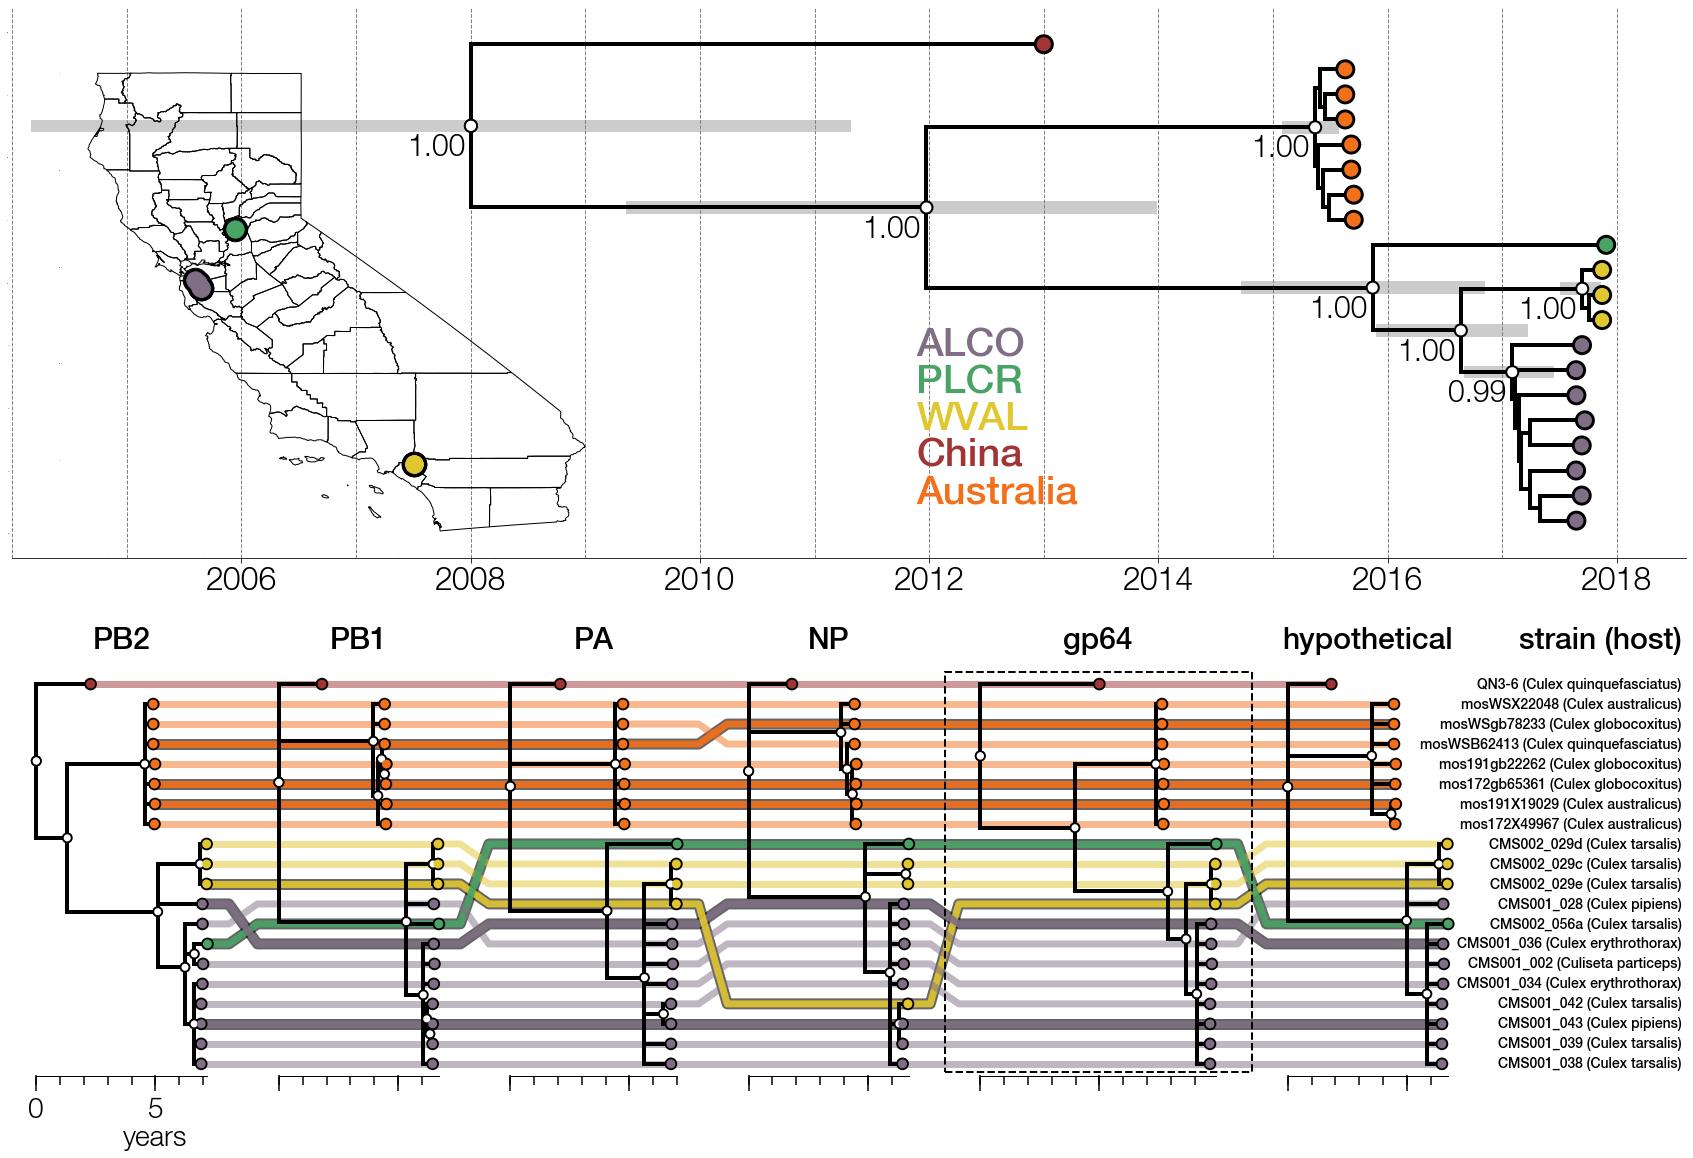

In [5]:
fig = plt.figure(figsize=(30, 20),facecolor='w') 
gs = gridspec.GridSpec(2,1,height_ratios=[1.2,1],wspace=0.01,hspace=0.15) 

ax=plt.subplot(gs[1],facecolor='w')
ax1=plt.subplot(gs[0],facecolor='w')

cmap=mpl.cm.Spectral
cumulative_displace=0 ## this tracks the "current" x position, so trees are plotted one after another

def desaturate(rgb,sat=None,lum=None):
    if isinstance(rgb,str):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given
    elif np.array(rgb).shape[-1]==4: ## if there's four values
        rgb=rgb[:-1]
    elif isinstance(rgb,unicode):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given

    assert 0.0<=sat<=1.0,'Desaturation outside allowed interval'
    assert np.array(rgb).shape[-1]==3,'Incorrect colour array shape'
    hsv=mpl.colors.rgb_to_hsv(rgb) ## convert rgb vector to hue, saturation, value
    if sat!=None:
        hsv[1]=sat ## use provided saturation
    if lum!=None:
        hsv[2]=lum ## use provided luminosity
    
    return mpl.colors.hsv_to_rgb(hsv) ## convert back to rgb


contigs=lambda k: k.branchType=='leaf' and 'CMS' in k.name
sampleID=lambda k: k.name.split('|')[0] if isinstance(k,bt.leaf) else k.split('|')[0]

meta_geo_lat=lambda k: float(metadata[sampleID(k)]['collection_lat']) if metadata[sampleID(k)]['collection_lat']!='NA' else None
meta_geo_lon=lambda k: float(metadata[sampleID(k)]['collection_long']) if metadata[sampleID(k)]['collection_long']!='NA' else None

lats=list(map(float,filter(None,map(meta_geo_lat,ll.getBranches(contigs)))))
lons=list(map(float,filter(None,map(meta_geo_lon,ll.getBranches(contigs)))))

norm_lat=mpl.colors.Normalize(vmin=min(lats),vmax=max(lats))
norm_lon=mpl.colors.Normalize(vmin=min(lons),vmax=max(lons))

tip_groups={}
tip_colours={}
for k in trees['PB1'].getExternal():
    if 'QN' in k.name:
        tip_groups[k.name]='china'
        tip_colours[k.name]='#A13434'
    elif 'CMS' in k.name:
        tip_groups[k.name]=metadata[sampleID(k.name)]['collected_by']
    else:
        tip_groups[k.name]='australia'
        
        
for g,group in enumerate(sorted(set(tip_groups.values()),key=lambda w: len(w)==4)):
    members=[k for k in tip_groups if tip_groups[k]==group]
    for t,tip in enumerate(sorted(members,key=lambda w: tip_positions['PB1'][w][1])):
#         print(tip)
        shift=1
        if group=='australia':
            cmap=mpl.cm.Oranges
            frac=0.6
            tip_colours[tip]=cmap(frac) ##desaturate(cmap(frac),sat=saturation)
            
        elif group!='china':
            tip_colours[tip]=sample_colour[metadata[sampleID(tip)]['collected_by']]
            
    if group.capitalize() in ['China','Australia']:
        group=group.capitalize()
    else:
        group=group.upper()
    ax1.text(0.54,0.10+g/15.0,group,size=40,
             color=tip_colours[members[0]],transform=ax1.transAxes,zorder=100)

# subax = fig.add_axes([0.15,0.4,0.35,0.35],facecolor='none',zorder=0)
subax = fig.add_axes([0.1,0.5,0.35,0.35],facecolor='none',zorder=0)
subax.set_aspect(1)
subax.tick_params(size=0,labelsize=0)
[subax.spines[side].set_visible(False) for side in subax.spines]

for loc in polygons:
    county=PatchCollection(polygons[loc],facecolor='none',edgecolor='k',zorder=0)
    subax.add_collection(county)
subax.plot()

for k in cur_tree.getBranches(contigs):
    if meta_geo_lat(k):
        colour=sample_colour[metadata[sampleID(k.name)]['collected_by']]
        subax.scatter(meta_geo_lon(k),meta_geo_lat(k),s=300,
                      facecolor=colour,zorder=100)
        subax.scatter(meta_geo_lon(k),meta_geo_lat(k),s=600,facecolor='k',zorder=99)


tree_names=['PB2','PB1','PA','NP','gp64','hypothetical']
WMV6=set([])
displaceAmount=3

for t,tr in enumerate(tree_names): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    x_attr=lambda k: k.height+cumulative_displace
    
    b_func=lambda k: 4
    cn_func=lambda k: 'k'
    
    cur_tree.plotTree(ax,x_attr=x_attr,branchWidth=b_func,colour_function=cn_func)
    
    for k in cur_tree.getInternal(lambda k: k.traits['posterior']>0.95):
        ax.scatter(x_attr(k),k.y,s=50,facecolor='w',edgecolor='none',zorder=100)
        ax.scatter(x_attr(k),k.y,s=120,facecolor='k',edgecolor='none',zorder=99)
    
    WMV6=WMV6.union(set(filter(lambda w: 'CMS' in w,[k.name for k in cur_tree.getExternal()])))
    for k in cur_tree.getExternal(): ## iterate over branches
        y=k.y

        colour=tip_colours[k.name]
        if 'CMS' in k.name:
            colour=sample_colour[metadata[sampleID(k.name)]['collected_by']]
        ax.scatter(x_attr(k),y,s=80,facecolor=colour,edgecolor='none',zorder=100)
        ax.scatter(x_attr(k),y,s=160,facecolor='k',edgecolor='none',zorder=99)

        if t!=len(tree_names)-1: ## as long as we're not at the last tree - connect tips with coloured lines
            if k.name in tip_positions[tree_names[t+1]]:
                next_x,next_y=tip_positions[tree_names[t+1]][k.name] ## fetch coordinates of same tip in next tree
                next_x+=cumulative_displace+cur_tree.treeHeight+displaceAmount ## adjust x coordinate by current displacement and future displacement
                nextIncrement=cumulative_displace+cur_tree.treeHeight
                
                step1=(x_attr(k),y)
                step2=(nextIncrement+0.3*displaceAmount,y)
                step3=(nextIncrement+0.7*displaceAmount,next_y)
                step4=(next_x,next_y)
                
                xs,ys=zip(*(step1,step2,step3,step4))
                
                if '29e' in k.name or '56a' in k.name or '036' in k.name or '043' in k.name or '191X' in k.name or '172g' in k.name or 'WSgb' in k.name:
                    ax.plot(xs,ys,lw=7,ls='-',color=colour,zorder=0,alpha=0.9,solid_capstyle='round')
                    ax.plot(xs,ys,lw=11,ls='-',color='k',zorder=-1,alpha=0.6,solid_capstyle='round')
                else:
                    ax.plot(xs,ys,lw=7,ls='-',color=colour,zorder=0,alpha=0.5,solid_capstyle='round') ## connect current tip with same tip in the next tree
                
    ax.text(cumulative_displace+cur_tree.treeHeight/2,max([T.ySpan for T in trees.values()])+1,tr,size=30,va='bottom',ha='center')
    
    ax.plot([cumulative_displace,cumulative_displace+cur_tree.treeHeight],[-0.1,-0.1],lw=1,color='k')
    ax.eventplot(np.arange(cumulative_displace,cumulative_displace+cur_tree.treeHeight,1.0),
                 linelengths=0.4,colors=['k'],lineoffsets=[-0.35])
    ax.eventplot(np.arange(cumulative_displace,cumulative_displace+cur_tree.treeHeight,5.0),
                 linelengths=0.8,colors=['k'],lineoffsets=[-0.46])
    
    
    if tr=='gp64':
        outline=plt.Rectangle((cumulative_displace-displaceAmount/2.0,0.1),
                              cur_tree.treeHeight+displaceAmount,cur_tree.ySpan,
                              facecolor='none',edgecolor='k',ls='--',lw=2)
        ax.add_patch(outline)
    
    cumulative_displace+=cur_tree.treeHeight+displaceAmount ## increment displacement by the height of the tree

# print(WMV6)

offsetLabels=3.8
for k in cur_tree.getExternal():
    components=k.name.split('|')
    strain=components[0]
    if 'CMS' in strain:
        strain='_'.join(strain.split('_')[:2])
    host=' '.join(components[1].split('_'))
    name=r'%s (%s)'%(strain,host)
    ax.text(offsetLabels+cumulative_displace+displaceAmount,k.y,name,size=14,ha='right',va='center')

ax.text(offsetLabels+cumulative_displace+displaceAmount,max([T.ySpan for T in trees.values()])+1,'strain (host)',size=30,ha='right',va='bottom')

for t in range(0,6,5):
    ax.text(t,-1.2,'%d'%(t),size=28,va='top',ha='center',weight=300)
ax.text(5,-2.6,'years',size=28,va='top',ha='center',weight=300)
    
[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

ax.tick_params(axis='x',size=0)
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylim(-1,cur_tree.ySpan+2) ## set y limits
ax.set_xlim(-1,cumulative_displace+7)



focusTree=bt.loadNexus('/Users/evogytis/Dropbox/Jupyter_notebooks/Biohub/California_mosquitoes/timetree_WuhanMosquitoVirus6/WMV6_dated.WMV6_gp64_dated.mcc.tree')
focusTree.treeStats()

b_func=lambda k: 4

focusTree.plotTree(ax1,
                   x_attr=lambda k: k.absoluteTime,
                   branchWidth=b_func,
                   colour_function=cn_func)

for k in focusTree.getInternal(lambda k: k.traits['posterior']>0.95):
    ax1.scatter(k.absoluteTime,k.y,s=100,facecolor='w',edgecolor='none',zorder=100)
    ax1.scatter(k.absoluteTime,k.y,s=200,facecolor='k',edgecolor='none',zorder=99)

for k in focusTree.getExternal(): ## iterate over branches
    y=k.y
    colour=tip_colours[k.name]
    if 'CMS' in k.name:
        colour=sample_colour[metadata[sampleID(k.name)]['collected_by']]
    ax1.scatter(k.absoluteTime,y,s=200,facecolor=colour,edgecolor='none',zorder=100)
    ax1.scatter(k.absoluteTime,y,s=400,facecolor='k',edgecolor='none',zorder=99)

for k in focusTree.getInternal(lambda k: k.length>0.3)+[focusTree.root]:
    l,u=k.traits['height_95%_HPD']
    h=0.5
#     print((cur_tree.mostRecent-l,k.y),u,l,u-l,h)
    if k==focusTree.root:
        print('lower: %.2f \nmean: %.2f \nupper: %.2f \nmin tree height: %.2f \nmean tree height: %.2f \nmax tree height: %.2f'%(cur_tree.mostRecent-u,k.absoluteTime,cur_tree.mostRecent-l,u,cur_tree.mostRecent-k.absoluteTime,l))
    confidence=plt.Rectangle((cur_tree.mostRecent-u,k.y-h/2),u-l,h,facecolor='k',edgecolor='none',alpha=0.2)
    ax1.add_patch(confidence)
    ax1.text(k.absoluteTime-0.05,k.y-0.3,'%.2f'%(k.traits['posterior']),size=30,ha='right',va='top',weight=300)
    
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))

ax1.tick_params(axis='y',labelsize=0,size=0)
ax1.tick_params(axis='x',labelsize=32,size=5)
for xtick in ax1.get_xticklabels():
    xtick.set_fontweight(300)
    
[ax1.spines[loc].set_visible(False) for loc in ['top','right','left']]
[ax1.axvline(t,ls='--',lw=1,color='grey') for t in range(2000,2019)]

ax1.set_xlim(focusTree.root.absoluteTime-4.0,focusTree.root.absoluteTime+focusTree.treeHeight+0.7)
ax1.set_ylim(-1,focusTree.ySpan+1)

plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/WuhanMosquitoVirus6_tangleChain.png',dpi=300,bbox_inches='tight')
plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/WuhanMosquitoVirus6_tangleChain.pdf',dpi=300,bbox_inches='tight')
plt.show()